In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

np.random.seed(42)

In [74]:
# Generate a simple dataset
# - score_exam: 0..100
# - admission: 0/1 sampled from a logistic probability

n = 250
score_exam = np.random.uniform(0, 100, size=n)

# Ground-truth relationship (unknown to the model):
# P(admission=1 | score) = sigmoid(a*(score - b))
a = 0.12
b = 55
p = 1 / (1 + np.exp(-a * (score_exam - b)))

admission = (np.random.uniform(0, 1, size=n) < p).astype(int)

df = pd.DataFrame({"score_exam": score_exam, "admission": admission})
df.head()

,score_exam,admission
0,37.454012,0
1,95.071431,1
2,73.199394,1
3,59.865848,1
4,15.601864,0


In [75]:
# Train logistic regression model with scikit-learn

X = df[["score_exam"]]
y = df["admission"]

model = LogisticRegression()
model.fit(X, y)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

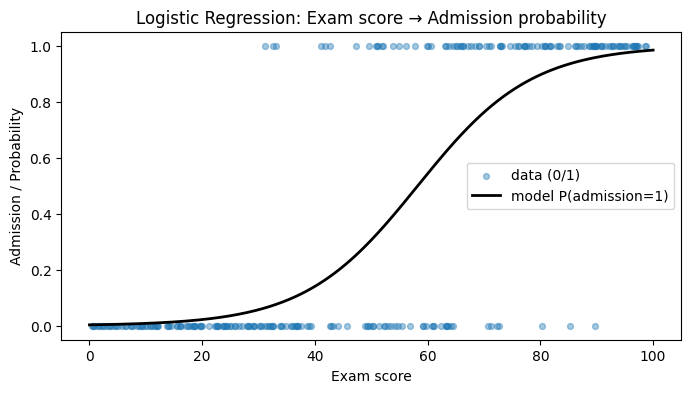

In [76]:
# Visualize: predicted probability of admission vs score

score_grid = np.linspace(0, 100, 400)
proba_grid = model.predict_proba(pd.DataFrame({"score_exam": score_grid}))[:, 1]

plt.figure(figsize=(8, 4))
plt.scatter(df["score_exam"], df["admission"], s=18, alpha=0.4, label="data (0/1)")
plt.plot(score_grid, proba_grid, color="black", linewidth=2, label="model P(admission=1)")
plt.xlabel("Exam score")
plt.ylabel("Admission / Probability")
plt.ylim(-0.05, 1.05)
plt.title("Logistic Regression: Exam score → Admission probability")
plt.legend()
plt.show()

In [77]:
# Predict admission probability for a new exam score

new_score = 70
new_proba = model.predict_proba(pd.DataFrame({"score_exam": [new_score]}))[0, 1]
new_pred = int(new_proba >= 0.5)

print(f"Score = {new_score}")
print(f"P(admission=1) = {new_proba:.3f}")
print(f"Predicted admission (threshold 0.5) = {new_pred}")

Score = 70
P(admission=1) = 0.762
Predicted admission (threshold 0.5) = 1
